# Spin-Orbit Coupling
## Action by Leonard A. Gómez-García

In this chapter, we start by further examining the effects of a tidal torque on a satellite’s rotation.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

In [5]:
#Packages
import numpy as np
import matplotlib.pyplot as plt

#Routines and constants from packages
from scipy.integrate import odeint
from scipy.constants import G

## 5.1. Introduction

In the previous chapter, we considered the effect of tides raised on a satellite by a planet where we assumed that the satellite was in a synchronous spin state

## 5.2 Tidal Despinning 

For small values of the satellite’s eccentricity e, the angle $\phi$ (Shown in book's Figure 5.1b) is given by:

$$
\phi \approx 2e \sin{nt}.
$$
The tidal torque acting to change the spin of the satellite is:

$$
N_{s} = -D \left( \frac{a}{r} \right)^{6}sign{(\dot{\eta}-\dot{\phi})}
$$

where

$$
D = \frac{3}{2} \frac{k_{2}}{Q_{s}} \frac{n_{4}}{\mathcal{G}} R_{s}^{5}
$$

and is a positive constant, and $Q_{s}$, $k_{2}$, and $R_{s}$ are the tidal dissipation function,
Love number, and radius of the satellite, respectively. A positive torque will act
to increase the spin of the satellite, $\dot{\eta}$.

**To do:** Change the $\tau(\mathrm{y})$ column to $R_{s}$

| Body | Type | Perturber | $k_2$ | $Q$ | $\tau(\mathrm{y})$ |
| :--- | :--- | :--- | :--- | ---: | :--- |
| Mercury | rocky | Sun | $(0.1)$ | $(100)$ | $4 \times 10^9$ |
| Venus | rocky | Sun | $0.25$ | $(100)$ | $6 \times 10^{10}$ |
| Earth | rocky | Sun | $0.299$ | $ 12 $ | $5 \times 10^{10}$ |
| Mars | rocky | Sun | $0.14$ | $ 86 $ | $7 \times 10^{12}$ |
| Earth | rocky | Moon | $0.299$ | $ 12 $ | $1 \times 10^{10}$ |
| Moon | rocky | Earth | $0.030$ | $ 27 $ | $2 \times 10^7$ |
| Phobos | rocky | Mars | $(0.0000004)$ | $(100)$ | $3 \times 10^5$ |
| Io | rocky | Jupiter | $(0.03)$ | $(100)$ | $2 \times 10^3$ |
| Europa | rocky | Jupiter | $(0.02)$ | $(100)$ | $4 \times 10^4$ |
| Hyperion | icy | Saturn | $(0.0003)$ | $(100)$ | $1 \times 10^9$ |
| Miranda | icy | Uranus | $(0.0009)$ | $(100)$ | $8 \times 10^3$ |
| Ariel | icy | Uranus | $(0.10)$ | $(100)$ | $1 \times 10^4$ |
| Triton | icy | Neptune | $(0.086)$ | $(100)$ | $4 \times 10^4$ |
| Charon | icy | Pluto | $(0.006)$ | $(100)$ | $6 \times 10^5$ |
| Pluto | icy | Charon | $(0.06)$ | $(100)$ | $1 \times 10^7$ |

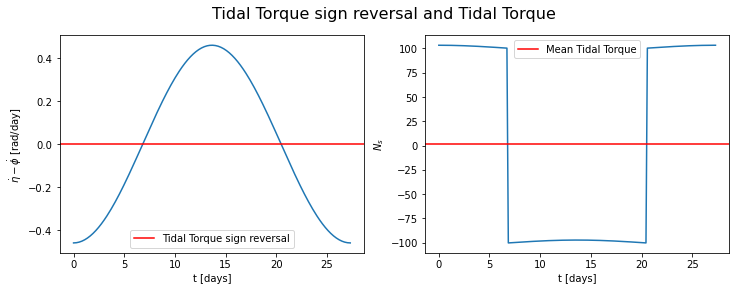

In [70]:
#Calculations of the mean Tidal torque for the Earth-Moon system.

#Tests
k2 = 0.030
Qs = 27
Rs = 1.7e6/6.3e6
a = 380e6
ecc = 0.005
f = np.linspace(0, 2*np.pi, 200)
t = np.linspace(0, 27.3, 200)
r = a*(1 - ecc**2)/(1 + ecc*np.cos(f))
n = 2*np.pi/27.3 # Moon's angular velocity
#eta_dot = n # Moon's rotation over itself
eta_dot = 0
e = 1
phi_dot = 2*e*n*np.cos(n*t)
sign_reversal = eta_dot - phi_dot

#Computing the Tidal Torque
D = 3/2*k2/Qs*n**4/G*Rs**5
Ns = -D*(a/r)**6*np.sign(sign_reversal)
delta = 0
Mean_Ns = 2*D/np.pi*(4*ecc*np.cos(delta) - delta)


fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Tidal Torque sign reversal and Tidal Torque', fontsize=16)
ax[0].plot(t, sign_reversal)
ax[0].axhline(0.0, color='red', 
           label='Tidal Torque sign reversal')
ax[0].set(xlabel='t [days]', 
       ylabel='$\dot{\eta}-\dot{\phi}$ [rad/day]')
ax[0].legend()

#Plot the Tidal torque function
ax[1].plot(t, Ns)
ax[1].set(xlabel='t [days]', 
       ylabel='$N_s$')
ax[1].axhline(Mean_Ns, color='red', 
           label='Mean Tidal Torque')
ax[1].legend();

As we can see, the Mean Tidal Torque for the Moon is almost 0, which means that the Moon is at an equilibrium state (because most satellites are at least partially solid and have permanent quadrupole moments, that is, permanent bulges or departures from sphericity.).

## 5.3 The Permanent Quadrupole Moment

During this section we define the principal moments of inertia:
$$
\mathcal{A} = \Sigma \delta m (y^{2} + z^{2})\\
\mathcal{B} = \Sigma \delta m (z^{2} + x^{2})\\
\mathcal{C} = \Sigma \delta m (x^{2} + y^{2})$$

The table 5.2 shows some physical and orbital quantities for Mercury and the Moon:

| Quantity | Mercury | Moon |
| :--- | :--- | :--- |
| $k_2$ | $0.1$ | $0.03$ |
| $Q$ | 100 | 27 |
| $e$ | $0.206$ | $0.0549$ |
| $\frac{(\mathcal{B}-\mathcal{A})}{\mathcal{C}}$ | $10^{-4}$ | $2.28 \times 10^{-4}$ |
| $H(p, e)$ | $0.65$ | $0.99$ |
| $T_{\text {libration }}$ | $17 \mathrm{y}$ | $2.88 \mathrm{y}$ |
| $\gamma_0$ | 2 arcsec | $9.6$ arcsec |
| $\frac{2 \pi}{\dot{\theta}_{\text {initial }}}$ | $9 \mathrm{~h}$ | $9 \mathrm{~h}$ |
| $T_{\text {despin }}$ | $5 \times 10^9 \mathrm{y}$ | $3 \times 10^7 \mathrm{y}$ |
| $\frac{\left\langle N_{\mathrm{s}}\right\rangle \pi}{U}$ | $10^{-4}$ | $6 \times 10^{-4}$ |

**To do:** Improve the table display

And applying this definition we now derive an expression for the external gravitational field of a permanently deformed satellite in terms of its principal moments of inertia, A , B , and C defined with respect to the centre of mass, in absence of tidal torques, we arrive at the equation of motion for $\theta$ 5.54:

$$
C\ddot{\theta} - \frac{3}{2}\left(\mathcal{B} - \mathcal{A}\right) \frac{Gm_{p}}{r^{3}}\sin{2\psi} = 0\\
C\ddot{\theta} - \frac{3}{2}\left(2mR_{s}^{2}\right) \frac{Gm_{p}}{r^{3}}\sin{2\psi} = 0 \tag{5.54}\\
$$

Let's solve this equation numerically:

**To do:** Solve and plot the equation

In [ ]:
#Defining the equation


#System to test: Earth-Moon
#Parameters to use: masses and radius


#Check units

**Ideas**
* Calculate $\mathcal{A}, \mathcal{B}, \mathcal{C}$ for an arbitrary planet.
* Show: Thus, in the absence of a permanent quadrupole moment, the Moon, for example, would rotate about 3% faster than the observed synchronous rate, and over a period of about 2.6 y, we would see both sides of the satellite

## 5.4 Spin-Orbit Resonance

However, in those cases of interest here, in which the spin rate $\dot{\theta}$ is commensurate with the mean motion $n$ , we can derive an equation of motion hat, although an approximation, is both useful and integrable. Because we are interested in those cases for which $\dot{\theta}$ is a rational multiple of the mean motion, we introduce a new variable

$$
\gamma = \theta - pM
$$

Thus, we can rewrite the equation 5.54 as:

$$
\ddot{\gamma}+\frac{3}{2} n^2\left(\frac{\mathcal{B}-\mathcal{A}}{\mathcal{C}}\right)\left(\frac{a}{r}\right)^3 \sin (2 \gamma+2 p M-2 f)=0 \tag{5.58}
$$

Expanding in Fourier-like Poisson series we arrive at the equation:

$$
\ddot{\gamma}+\frac{3}{2} \frac{(\mathcal{B}-\mathcal{A})}{\mathcal{C}} n^2\left(\left[S_1+S_2\right] \sin 2 \gamma+\left[S_3-S_4\right] \cos 2 \gamma\right)=0 \tag{5.69}
$$

We are interested to get an Spin-Orbit resonance, so we can approximate $\dot{\theta} \approx pn$ and $\dot{\gamma} \ll n$. Thus, by introducing this approximation, we have reduced the full equation of
motion 5.56, to the pendulum equation, which we can write as:

$$
\ddot{\gamma}=-[\operatorname{sign} H(p, e)] \frac{1}{2} \omega_0^2 \sin 2 \gamma,
$$
where
$$
\omega_0=n\left[3\left(\frac{\mathcal{B}-\mathcal{A}}{\mathcal{C}}\right)|H(p, e)|\right]^{1 / 2}
$$
is the libration frequency.

**Ideas**
* Apply the equations from Section 5.4 to demonstrate the Fig. 5.9. Statement: 'In an inertial frame centred on the Sun, the planet Mercury completes p=3/2 rotations each orbital period.'
* Test the equation for diferent values of p

## 5.5 Capture into Resonance

**To do:**
* Check the $H(p, e)$ function.
* Check the probability of capture



## 5.6 Forced Librations

## 5.7 Surface of Section